# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

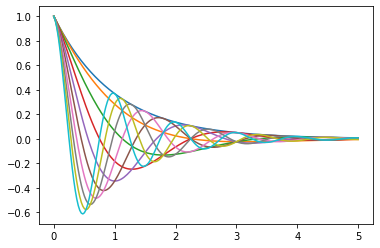

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = np.linspace(0, 5, 200)
figure, axes = plt.subplots()
for e in np.linspace(0,2,10):
    axes.plot(x, np.cos(np.pi * e * x) * np.exp(-x))

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

Text(0, 0.5, 'Double faults per match')

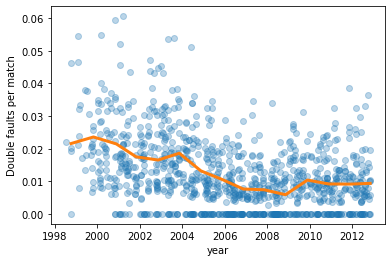

In [31]:
df = pd.read_csv('data/tennis.csv')
df['df/m'] = df['player1 double faults']/df['player1 total points total'] #df/m = double faults per match

figure, axes = plt.subplots()
axes.plot_date(pd.to_datetime(df['start date']), df['df/m'], alpha=0.3)
axes.plot_date(pd.to_datetime(df.groupby('year')['start date'].max()), df.groupby('year')['df/m'].mean(), '-', lw=3)
plt.xlabel('year')
plt.ylabel('Double faults per match')

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [50]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


In [146]:
#Get the stock price changes for each company and sort them
x = ticker.iloc[0]    
y = ticker.iloc[-1]   
p_change = (y - x) / x * 100
p_change.sort_values(inplace=True)
p_change

PTR    -17.369887
BA       0.602209
BHP     14.312575
IBM     16.344062
KO      17.941611
AMZN    20.057432
TM      20.863429
INTC    27.124036
GOOG    27.840517
SNE     39.573067
QCOM    53.710803
MSFT    55.953316
AAPL    85.948580
dtype: float64

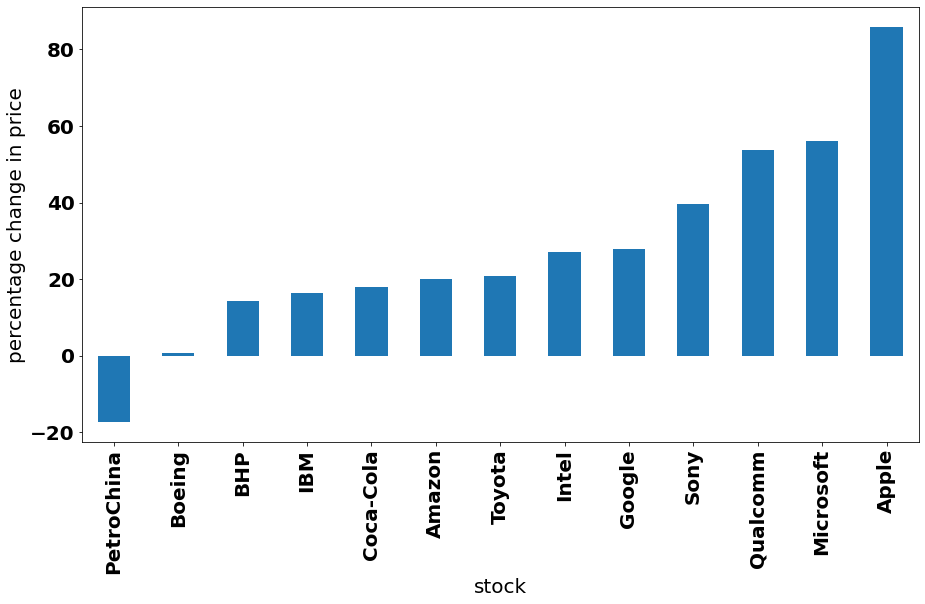

In [170]:
figure, axes = plt.subplots(figsize=(15,8))
p_change = p_change.rename(index=ticker_list)
axes.set_xlabel('stock')
axes.set_ylabel('percentage change in price')
p_change.plot(kind='bar', ax=axes)
p_change.plot(kind='bar')

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [107]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

share_data = read_data(indices_list,
                       start = dt.datetime(1970, 1, 1),
                       end = dt.datetime(2021, 1, 1))

df_returns = pd.DataFrame()

for index, name in indices_list.items():
    price_1 = share_data.groupby(share_data.index.year)[index].first()  
    price_2 = share_data.groupby(share_data.index.year)[index].last()
    df_returns[name] = (price_2 - price_1) / price_1

df_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1970,-0.009140,NaN,NaN,-0.173007
1971,0.120022,0.141200,NaN,0.364072
1972,0.161110,0.176683,NaN,0.920112
1973,-0.180940,-0.315234,NaN,-0.176970
1974,-0.298116,-0.353507,NaN,-0.099143
1975,0.284209,0.278748,NaN,0.167980
1976,0.182178,0.253907,NaN,0.133496
1977,-0.111215,0.075340,NaN,-0.027174
1978,0.024408,0.134423,NaN,0.232942


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4BC10D4C0>,
      dtype=object)

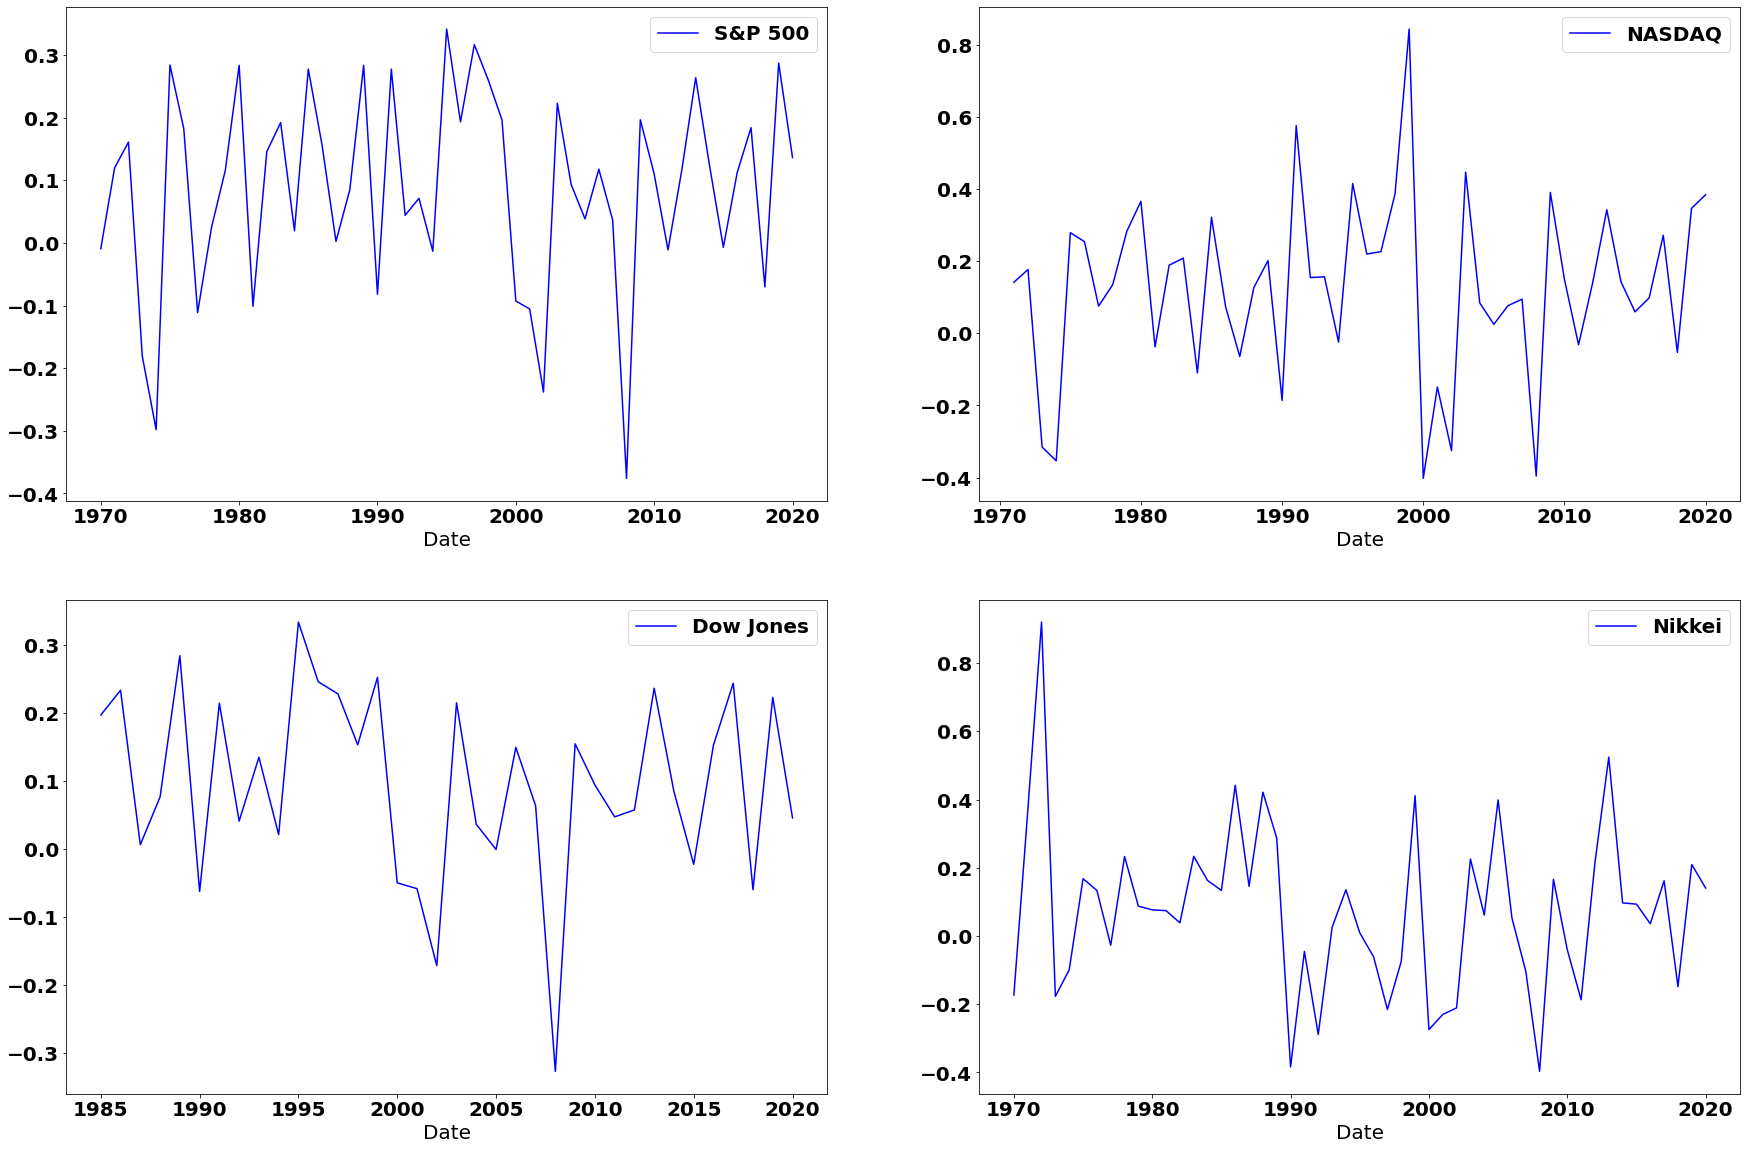

In [169]:
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

df_returns.plot(subplots=True,
                layout=(2,2),
                figsize=(30,20),
                sharex=False,
                style='b')

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [37]:
set(df.surface)

{'Indoor: Carpet',
 'Indoor: Clay',
 'Indoor: Hard',
 'Outdoor: Clay',
 'Outdoor: Grass',
 'Outdoor: Hard'}

In [41]:
indoor_carpet = df[df.surface == 'Indoor: Carpet']
indoor_clay = df[df.surface == 'Indoor: Clay'] # indoor_clay['player1 double faults'] are all NaN
indoor_hard = df[df.surface == 'Indoor: Hard']
outdoor_clay = df[df.surface == 'Outdoor: Clay']
outdoor_grass = df[df.surface == 'Outdoor: Grass']
outdoor_hard = df[df.surface == 'Outdoor: Hard']

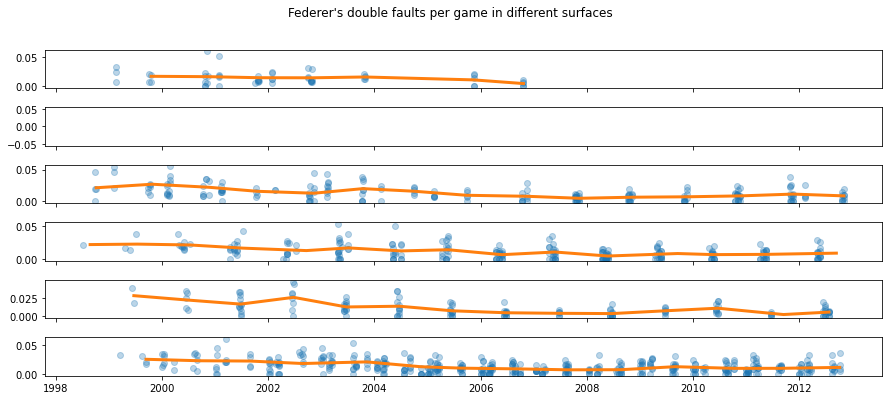

In [104]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,sharex=True, figsize=(15,6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Federer's double faults per game in different surfaces")

ax1.plot_date(pd.to_datetime(indoor_carpet['start date']), indoor_carpet['df/m'], alpha=0.3)
ax1.plot_date(pd.to_datetime(indoor_carpet.groupby('year')['start date'].max()), indoor_carpet.groupby('year')['df/m'].mean(), '-', lw=3)

ax2.plot_date(pd.to_datetime(indoor_clay['start date']), indoor_clay['df/m'], alpha=0.3)
ax2.plot_date(pd.to_datetime(indoor_clay.groupby('year')['start date'].max()), indoor_clay.groupby('year')['df/m'].mean(), '-', lw=3)

ax3.plot_date(pd.to_datetime(indoor_hard['start date']), indoor_hard['df/m'], alpha=0.3)
ax3.plot_date(pd.to_datetime(indoor_hard.groupby('year')['start date'].max()), indoor_hard.groupby('year')['df/m'].mean(), '-', lw=3)

ax4.plot_date(pd.to_datetime(outdoor_clay['start date']), outdoor_clay['df/m'], alpha=0.3)
ax4.plot_date(pd.to_datetime(outdoor_clay.groupby('year')['start date'].max()), outdoor_clay.groupby('year')['df/m'].mean(), '-', lw=3)

ax5.plot_date(pd.to_datetime(outdoor_grass['start date']), outdoor_grass['df/m'], alpha=0.3)
ax5.plot_date(pd.to_datetime(outdoor_grass.groupby('year')['start date'].max()), outdoor_grass.groupby('year')['df/m'].mean(), '-', lw=3)

ax6.plot_date(pd.to_datetime(outdoor_hard['start date']), outdoor_hard['df/m'], alpha=0.3)
ax6.plot_date(pd.to_datetime(outdoor_hard.groupby('year')['start date'].max()), outdoor_hard.groupby('year')['df/m'].mean(), '-', lw=3)